<a href="https://colab.research.google.com/github/pavanrj3/power-bi1/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

experiment 1

In [ ]:
import numpy as np
import pandas as pd
import csv
num_attribute=6
print("\n the given training data set \n")
data=pd.read_csv('/content/sample_data/california_housing_test.csv')
print(data)
print("\nthe initial value of hypothesis\n")
hypothesis=['0']*num_attribute
print(hypothesis)
for j in range(0,num_attribute):
  hypothesis[j]=data.iloc[0][j];
print("\n find s: finding a maximally specific hypothesis\n")
for i in range(0,4):
  if data.iloc[i][num_attribute]=='No':
    for j in range(0,num_attribute):
      if data.iloc[i][j]!=hypothesis[j]:
        hypothesis[j]='?'
      else:
        hypothesis[j]=data.iloc[i][j]
  print("for training example no : {0} the hypothesis is".format(i),hypothesis)
print("\n the maximally specific hypothesis for a given training example :\n")
print(hypothesis)


 the given training data set 

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  m

/tmp/ipython-input-3-3524736685.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hypothesis[j]=data.iloc[0][j];
/tmp/ipython-input-3-3524736685.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data.iloc[i][num_attribute]=='No':


experiment 2

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('weather.csv')
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h \n",specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("initialization of general_h \n", general_h)

    for i, h in enumerate(concepts):
        if target[i] == "yes":
            print("If instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("If instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print(" step {}".format(i+1))
        print(specific_h)
        print(general_h)
        print("\n")
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

initialization of specific_h 
 ['Sunny' 'Warm' 'Norml' 'Strong' 'Warm' 'same']
initialization of general_h 
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
If instance is Positive 
 step 1
['Sunny' 'Warm' 'Norml' 'Strong' 'Warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]




If instance is Positive 
 step 2
['Sunny' 'Warm' '?' 'Strong' 'Warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]




If instance is Negative 
 step 3
['Sunny' 'Warm' '?' 'Strong' 'Warm' 'same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'

Experiment 3

[[98 10]
 [ 4 59]]
classification_report-
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       108
           1       0.86      0.94      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



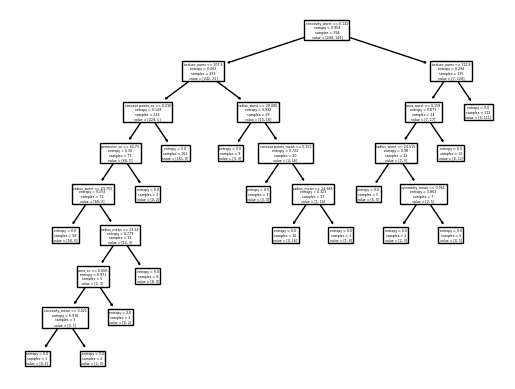

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
data=pd.read_csv("cancer.csv")
data.isnull().sum()
x=data.iloc[:,1:].values
y=data.iloc[:,0].values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
model=DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
features=data.columns
tree.plot_tree(model,feature_names=features)
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("classification_report-\n",classification_report(y_test,y_pred))

exercise 4

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data=pd.read_csv("/content/Salary_dataset.csv")
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values.reshape(-1,1)
model=LinearRegression()

x_train=data.iloc[:-5,0].values

x_test=data.iloc[-5:,0].values.reshape(-1,1)

y_train=data.iloc[:-5,1].values

y_test=data.iloc[-5:,1].values

model.fit(x_train.reshape(-1,1),y_train)
print(model.intercept_,model.coef_)
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred=model.predict(x_test)
data.info()
data.describe()



1.0501538461538473 [0.28915385]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

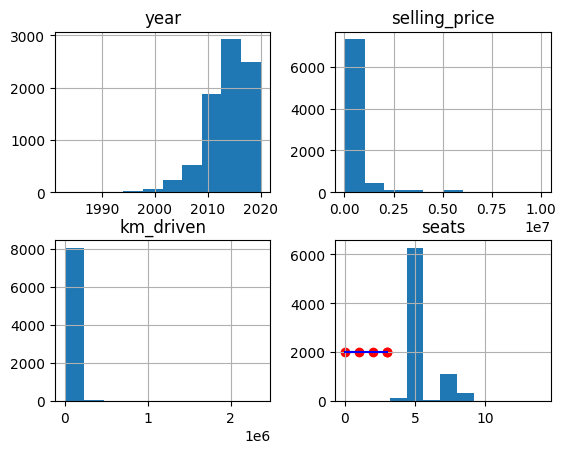

In [ ]:
#Linear Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('car.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values.reshape(-1,1)
model= LinearRegression()
le=LabelEncoder()
x_train= le.fit_transform(data.iloc[: -5,0])
x_test= le.fit_transform(data.iloc[-5:,0]).reshape(-1,1)
y_train= data.iloc[: -5,1].values
y_test= data.iloc[-5:,1].values
model.fit(x_train.reshape(-1,1),y_train)
print(model.intercept_,model.coef_)
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred= model.predict(x_test)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',np.sqrt(mse))
import matplotlib.pyplot as plt
data.hist()
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.show()

4b exe

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

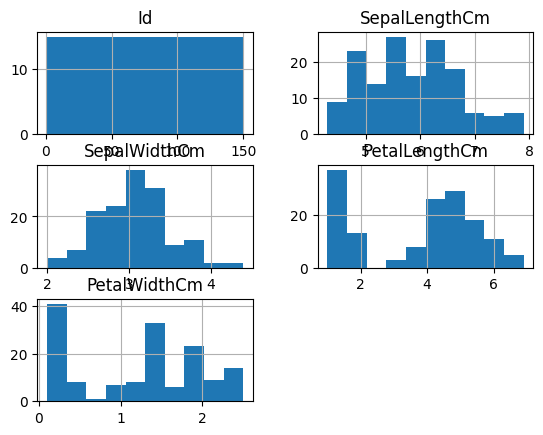

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('Iris.csv')
data
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one=ColumnTransformer(transformers=[('state',OneHotEncoder(),[3])],remainder='passthrough')
x = one.fit_transform(x)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('Classification report:\n',classification_report(y_test,y_pred,))
print('Confusion matrix:',cm)
print('Accuracy score:',acc*100)
data.hist()
plt.show()

4c exe

In [ ]:
import numpy as np
import pandas as pd
data= pd.read_csv('cancer.csv')
data.isnull().sum()
x=data.iloc[:,1:].values
y=data.iloc[:,0].values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
model=DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
mod_score=model.score(x_train,y_train)
print("model score: ",mod_score)
y_pred=model.predict(x_test)
from sklearn import metrics




ex 5

# New section

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
data=pd.read_csv('QualityPrediction.csv')
print(data)

data=pd.read_csv('QualityPrediction.csv')
print(data)
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())
print(data.isnull().sum())

x=data.iloc[:,:-1].values.reshape(-1,1)
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=DecisionTreeRegressor(max_depth=1)
regressor.fit(x_train,y_train)
avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(regressor,x_train,y_train,x_test,y_test,loss='mse',random_seed=1)

print('----------------------------------')
x=np.linspace(min(x_train),max(x_train),100)
plt.plot(x_train,y_train,'o')
plt.plot(x,regressor.predict(x.reshape(-1,1)),color='red')
plt.show()
plt.xlabel('employee')
plt.ylabel('salary')
plt.title('salary prediction')
plt.title('model with a high bias')
print('average bias:',avg)
print('average variance:',avg)








      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

ValueError: Found input variables with inconsistent numbers of samples: [159920, 7996]

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,Safe
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,Safe
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,Unsafe
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,Safe
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,Safe
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,Safe
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,Safe
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,Safe


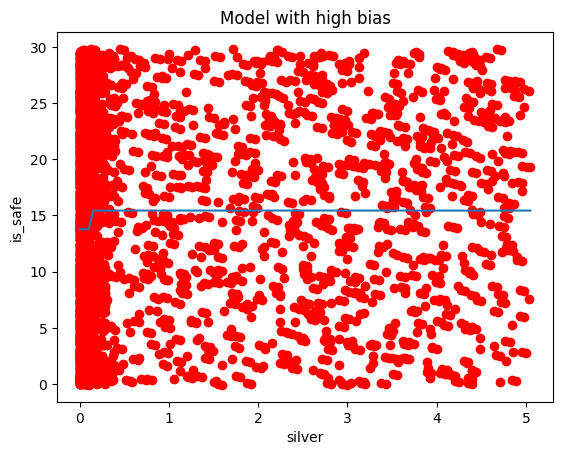

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_csv('QualityPrediction.csv')
print(df)
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
regressor=DecisionTreeRegressor(max_depth=1)
avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(regressor,x_train,y_train,x_test,y_test,loss='mse',num_rounds=100,random_seed=1)
print('___________________________________________________')
x=np.linspace(min(x_train),max(x_train),100)
plt.plot(x,regressor.predict(x))
plt.scatter(x_train,y_train,color='red')
plt.xlabel('silver')
plt.ylabel('is_safe')
plt.title('Model with high bias')
print('Average Bias:',avg_bias)
print('Average Variance:',avg_var)




df.drop_duplicates(keep='first',inplace=True)
df

exe 6

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('weather.csv')
print(data.head())
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
oh = OneHotEncoder()
def fun1(data):
  for c in data.columns:
    if data.dtypes[c] == object:
      data[c] = le.fit_transform(data[c].astype(str))
  return data
print('\n After Label Encoding: \n',fun1(data))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

 After Label Encoding: 
      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          

ex 8

In [ ]:
import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
lines = csv.reader(csvfile)dataset = list(lines)
for x in range(len(dataset)-1):for y in range(4):
dataset[x][y] = float(dataset[x][y])if random.random() < split:
trainingSet.append(dataset[x])else:
testSet.append(dataset[x])
def euclideanDistance(instance1, instance2, length):distance = 0
for x in range(length):
distance += pow((instance1[x] - instance2[x]), 2)return math.sqrt(distance)
def getNeighbors(trainingSet, testInstance, k):distances = []
length = len(testInstance)-1
for x in range(len(trainingSet)):
dist = euclideanDistance(testInstance, trainingSet[x], length)distances.append((trainingSet[x], dist))
distances.sort(key=operator.itemgetter(1))neighbors = []
for x in range(k):
neighbors.append(distances[x][0])return neighbors
def getResponse(neighbors):classVotes = {}
for x in range(len(neighbors)): response = neighbors[x][-1]if response in classVotes:
classVotes[response] += 1
else:
classVotes[response] = 1
sortedVotes = sorted(classVotes.iteritems(),reverse=True)
return sortedVotes[0][0]
def getAccuracy(testSet, predictions): correct = 0 for x in range(len(testSet)):
key=operator.itemgetter(1
),
if testSet[x][-1] == predictions[x]:correct += 1
return (correct/float(len(testSet))) * 100.0
def main():
# prepare data trainingSet=[] testSet=[]split = 0.67
loadDataset('knndat.data', split, trainingSet, testSet) print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
# generate predictions predictions=[]k=3
for x in range(len(testSet)):
neighbors = getNeighbors(trainingSet, testSet[x],k) result = getResponse(neighbors)
predictions.append(result)
print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1])) accuracy = getAccuracy(testSet,
predictions)
print('Accuracy: ' + repr(accuracy) +'%') main()

IndentationError: expected an indented block after 'with' statement on line 7 (<ipython-input-2-aa7cf91eab95>, line 8)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbours import KNeighboursClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics
data=pd.read_csv("")
data
data.head()
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.89,random_state=0)
classifier=KNeighboursClassifier(n_neighbours=5).fit(Xtrain,Ytrain)
y_pred=classifier.predict(xtest)
i=0
print("\n------------------------------------------------------------------")
print('%25s %25s %25s'%('Original Label','Predicted Label','Correct/Wrong'))
print("\n------------------------------------------------------------------")
for label in y_test:
  print('%25s %25s'%(label,y_pred[i]),end="")
  if(label==y_pred[i]):
    print('%25s'%('Correct'))
  else:
    print('%25s'%('Wrong'))
    i=i+1
    print("------------------------------------------------------------------")
    print("\nconfusionmatrix:\n")


In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
xy = 0
n = len(x)
for i in range(n):
    xy += x[i] * y[i]
xy_mean = xy / n
x_mean = np.mean(x)
y_mean = np.mean(y)
x_squaremean = np.mean(x * x)
x_meansquare = x_mean * x_mean
a1 = (xy_mean - (x_mean * y_mean)) / (x_squaremean - x_meansquare)
a0 = y_mean - (a1 * x_mean)
print("(a1):", a1)
print("(a0):", a0)


(a1): 0.5999999999999996
(a0): 2.200000000000001


In [ ]:
from dataclasses import replace
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
url='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')
data.dropna(inplace=True)
X=data.drop('target',axis=1)
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans_label=kmeans.fit_predict(X_scaled)
gmm=GaussianMixture(n_components=2,random_state=42)
gmm_label=gmm.fit_predict(X_scaled)
kmeans_silhouette=silhouette_score(X_scaled,kmeans_label)
gmm_silhouette=silhouette_score(X_scaled,gmm_label)
print("K-Means Silhouette Score:",kmeans_silhouette)
print("GMM Silhouette Score:",gmm_silhouette)

K-Means Silhouette Score: 0.17511353215805028
GMM Silhouette Score: 0.15968887245939664


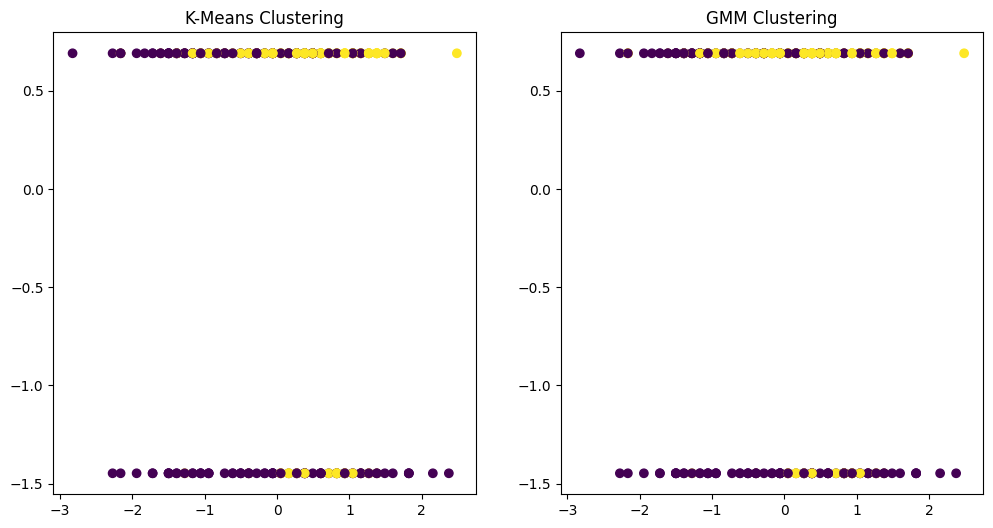

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(X_scaled[:,0],X_scaled[:,1],c=kmeans_label,cmap='viridis',marker='o')
ax[0].set_title('K-Means Clustering')
ax[1].scatter(X_scaled[:,0],X_scaled[:,1],c=gmm_label,cmap='viridis',marker='o')
ax[1].set_title('GMM Clustering')
plt.show()

exp 9

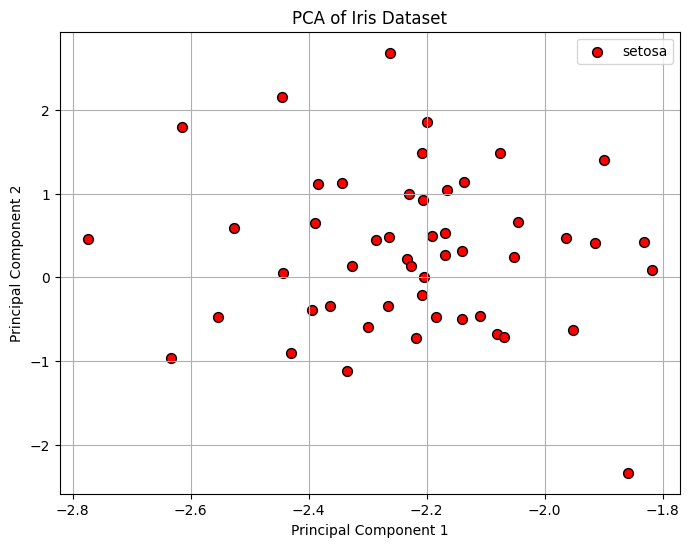

Explained Variance Ratio: [0.72962445 0.22850762]


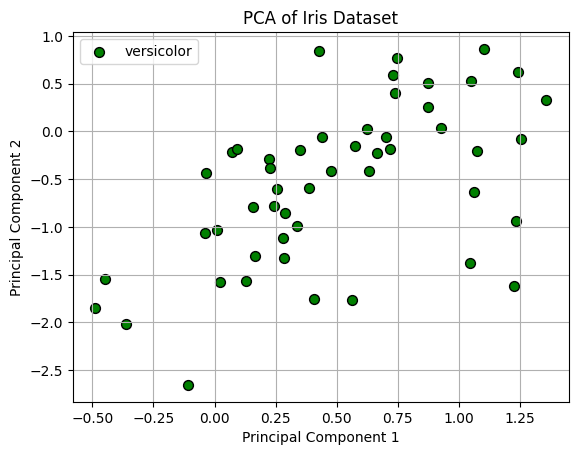

Explained Variance Ratio: [0.72962445 0.22850762]


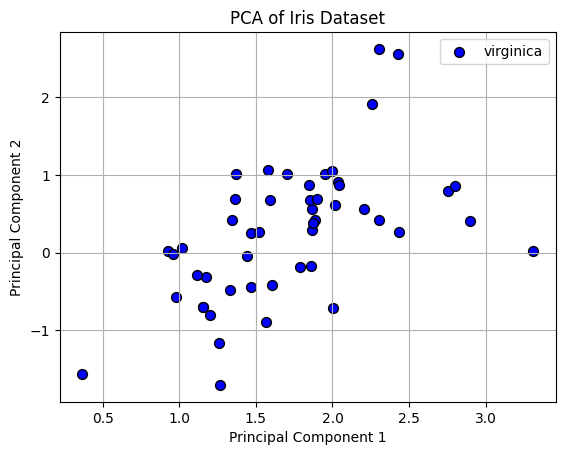

Explained Variance Ratio: [0.72962445 0.22850762]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principle_components = pca.fit_transform(x_scaled)

df_pca = pd.DataFrame(data=principle_components, columns=['PC1', 'PC2'])
df_pca['Target'] = y
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for target, color,label in zip([0,1,2], colors, target_names):
  plt.scatter(df_pca[df_pca['Target'] == target]['PC1'],
              df_pca[df_pca['Target'] == target]['PC2'],
              c=color,label=label,edgecolors='k',s=50)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA of Iris Dataset')
  plt.legend()
  plt.grid()
  plt.show()

  #6. Explain variance
  print("Explained Variance Ratio:", pca.explained_variance_ratio_)


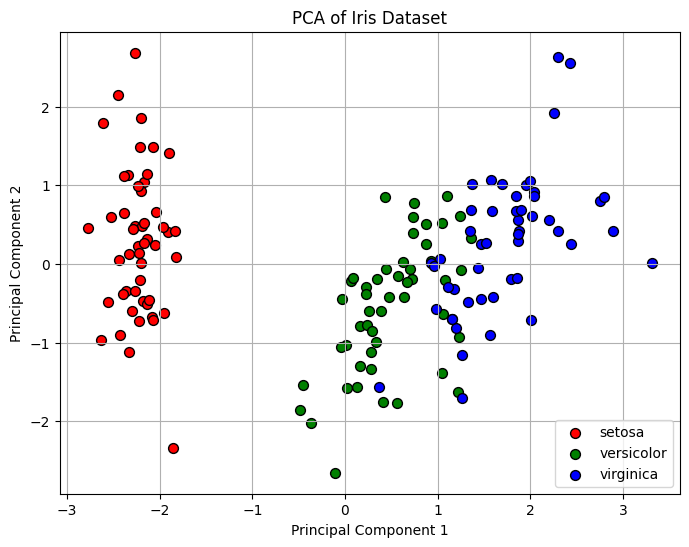

Explained Variance Ratio: [0.72962445 0.22850762]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principle_components = pca.fit_transform(x_scaled)

df_pca = pd.DataFrame(data=principle_components, columns=['PC1', 'PC2'])
df_pca['Target'] = y
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for target, color,label in zip([0,1,2], colors, target_names):
  plt.scatter(df_pca[df_pca['Target'] == target]['PC1'],
              df_pca[df_pca['Target'] == target]['PC2'],
              c=color,label=label,edgecolors='k',s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)